# Contenido de audio y video

## Audio y video en la web

En los inicios, las tecnologías web nativas como HTML no tenían el soporte para incrustar audio y video en la Web, tecnologías privadas (o basadas en plugins) como __Flash__ (y después, __Silverlight__) se convirtieron populares para manipular este tipo de contenido. Este tipo de tecnología funcionó bien, pero tenía ciertos problemas, incluidos el no trabajar bien con las características de HTML/CSS, problemas de seguridad y problemas de accesibilidad.

Unos pocos años después la especificación HTML5 tenía tales características agregadas, con los elementos `<video>` y `<audio>`, y algo nuevo __JavaScript__ __APIs__ para controlar estos. No veremos Javascript aquí — solo los fundamentos básicos que se pueden lograr con HTML.

> Nota: Antes de empezar, también deberías saber que hay un puñado de OVPs (proveedores de video online) como _YouTube_, _Dailymotion_ y _Vimeo_, y proveedores de audio como _Soundcloud_. Tales compañías ofrecen una conveniente fácil forma de hospedar y consumir videos, y que no tienes que preocuparte sobre el enorme ancho de banda que se consume. Los OVPs normalmente usan código prefabricado para incrustar video/audio en tus sitios web; si usas ese camino, puedes evitar algunas dificultades que discutimos en este artículo.

### El elemento `video`

El elemento `<video>` nos permite incrustar video fácilmente.

In [1]:
<video src="rabbit320.webm" controls>
    <p>Tu navegador no soporta HTML5 video. Aquí está el <a href="rabbit320.webm">enlace del video</a>.</p>
</video>

Tu navegador no soporta HTML5 video. Aquí está el enlace del video .

Las características a notar son:

* `src`: de la misma manera que para el elemento `<img>`, el atributo src (source) contiene una ruta al video que deseas incrustar. Funciona de la misma manera.

* `controls`: los usuarios deben ser capaces de controlar la reproducción de video y audio (esto es especialmente crítico en personas que padecen epilepsia). Se debe utilizar el atributo controls para incluir la interfaz de control del browser, o construir la nuestra utilizando la JavaScript API apropiada. Como mínimo la interfaz debe incluir una manera de empezar y terminar la reproducción, y ajustar el volumen.
* El párrafo dentro de la etiqueta `<video>`: se lo llama fallback content (contenido de reserva) — y será mostrado si el browser desde el que se está accediendo a la página no soporta el elemento `<video>`, permitiéndonos proveer un fallback para browsers más antiguos. Puede ser de la manera que se quiera; en este caso proporcionamos un link directo al archivo de video, por lo que el usuario puede al menos acceder de alguna manera, independientemente del browser que esté usando.

#### Uso de formatos múltiples para mejorar la compatibilidad

Diferentes navegadores soportan diferentes formatos de video (y audio).

##### Contenidos de un archivo de medios

Formatos como MP3, MP4 y WebM son llamados formatos contenedores. Estos contienen diferentes partes que componen toda la canción o video — como una pista de audio y una pista de video (en el caso del video), y metadatos para describir los contenidos que se presentan, qué codecs se usan para codificar sus canales, etcétera.

Un archivo WebM contiene una película que tiene una pista principal de video y otra pista con un ángulo alternativo, junto con audio en inglés y español, además de una pista con comentarios en inglés, lo que puede ser conceptualizado en el siguiente diagrama. También se incluyeron pistas de texto que contienen los subtítulos de la película en inglés, español y para el comentario.

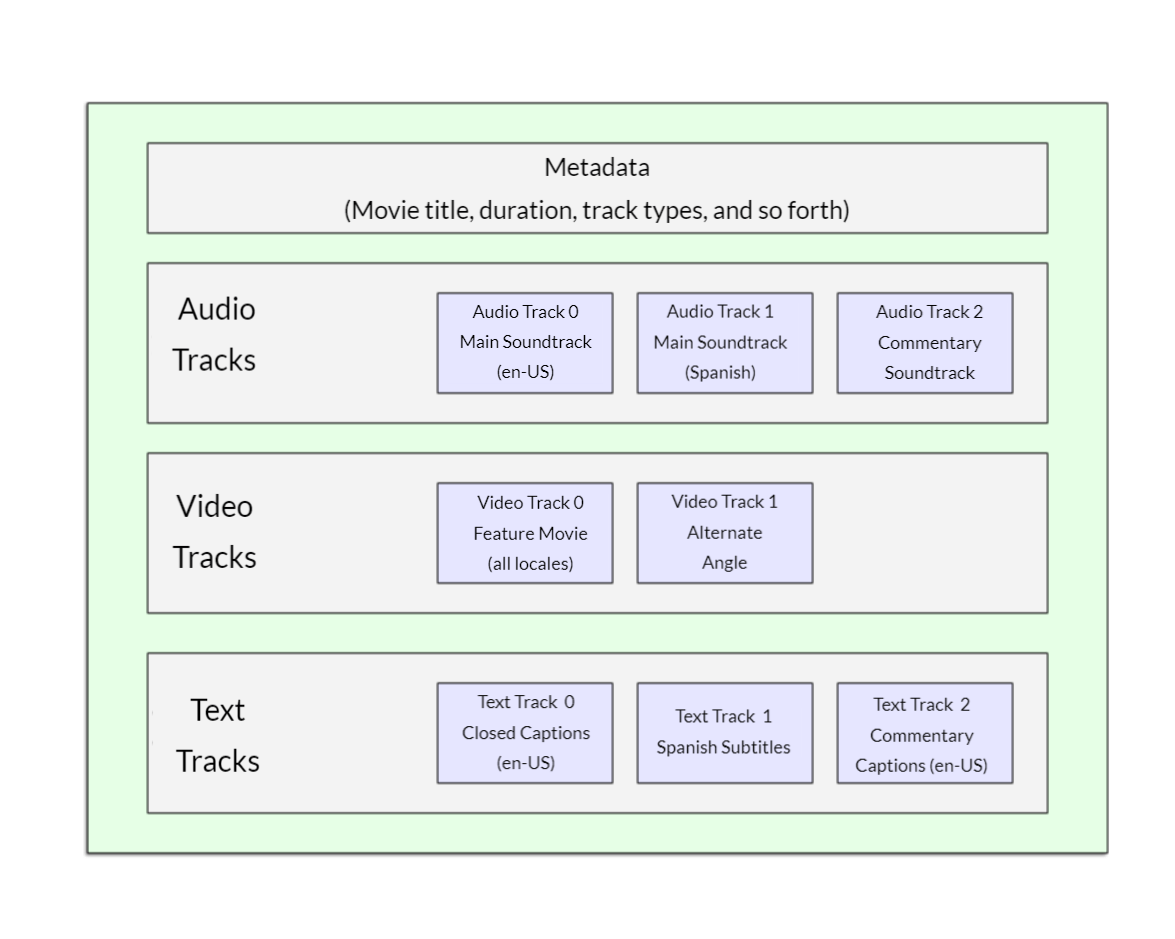

Las pistas de audio y video dentro del contenedor mantienen los datos en un formato adecuado para el codec usado para codificar ese medio. Se usan diferentes formatos para pistas de audio versus de video. Cada pista de audio es codificada usando un codec de audio mientras que las pistas de video son codificadas (como probablemente ya has adivinado) usando un codec de video. Así como hemos hablado previamente, diferentes navegadores soportan diferentras formatos de audio y video, y diferentes formatos contenedores (como MP3, MP4 y WebM, que pueden contener diferentes tipos de video y audio). Por ejemplo:

* Un WebM usualmente contiene paquetes de Ogg Vorbis audio con VP8/VP9 video. Soportado principalmente por Firefox y Chrome.

* Un MP4 contiene a menudo paquetes AAC o audio MP3 con videos H.264. Principalmente soportados en Internet Explorer y Safari.
* El antiguo contenedor Ogg suele usar audio Ogg Vorbis y video Ogg Theora. Es principalmente soportado por Firefox y Chrome, pero básicamente ha sido reemplazado por el formato WebM de mejor calidad.

Un reproductor de audio tenderá a reproducir directamente un track de audio. Por ejemplo un archivo MP3 u Ogg. No necesitan contenedores.

Los formatos anteriores existen para comprimir los archivos de audio y video volviéndolos manejables (el tamaño sin comprimir es muy grande). Los browsers contienen diferentes Codecs, como Vorbis o H.264, los cuales son usados para convertir el sonido y video comprimidos en binario y viceversa. No todos los browsers soportan los mismos codecs, por lo tanto, habrá que proveer varios archivos para cada producción multimedia. Si te falta el codec correcto para decodificar el medio, simplemente no se reproducirá.

> Nota: Debes estar preguntándote por qué sucede esto. El MP3 (para audio) y el MP4/H.264 (para video) son ampliamente compatibles y de buena calidad, sin embargo, también están patentados — sus patentes cubren MP3 al menos hasta 2017 y a H.264 hasta 2027, lo que significa que los browsers que no tienen la patente tienen que pagar grandes sumas de dinero para soportar estos formatos. Además, mucha gente no permite el software con restricciones, por estar a favor de formatos abiertos. Por todo esto es que tenemos que proveer múltiples formatos para los diferentes browsers.

In [2]:
<video controls>
    <source src="rabbit320.mp4" type="video/mp4">
    <source src="rabbit320.webm" type="video/webm">
    <p>Su navegador no soporta video HTML5. Aquí hay un <a href="rabbit320.mp4">enlace al video</a>.</p>
</video>

Su navegador no soporta video HTML5. Aquí hay un enlace al video .

Tomamos el atributo src del tag `<video>` y en su lugar incluimos elementos separados `<source>` que apuntan a sus propias fuentes. En este caso el browser irá a los elementos `<source>` y reproducirá el primero de los elementos que el codec soporte. Incluir fuentes WebM y MP4 debería bastar para reproducir el video en la mayoría de los browsers en estos días.

Cada elemento `<source>` también tiene un atributo type . Esto es opcional, pero se recomienda que se incluyan, ya que contienen __MIME types__ de los archivos de vídeo y los navegadores pueden leerlos y omitir inmediatamente los vídeos que no tienen. Si no están incluidos, los navegadores cargarán e intentarán reproducir cada archivo hasta que encuentren uno que funcione, lo que llevará aún más tiempo y recursos.

#### Otras características de la etiqueta `<video>`

In [3]:
<video controls width="400" height="400"
    autoplay loop muted
    poster="poster.png">
    <source src="rabbit320.mp4" type="video/mp4">
    <source src="rabbit320.webm" type="video/webm">
    <p>Su navegador no soporta vídeo HTML5. Este es un <a href="rabbit320.mp4">enlace al vídeo</a> alternativo.</p>
</video>

Su navegador no soporta vídeo HTML5. Este es un enlace al vídeo alternativo.

Las nuevas características son:

* `width` y `height`: puede controlar el tamaño con estos atributos o con CSS. En ambos casos, los vídeos mantienen su relación anchura - altura nativa. Si la relación de aspecto no se mantiene con los tamaños establecidos, el vídeo crecerá para rellenar el espacio horizontalmente y el el espacio sin rellenar sólo recibirá un color de fondo sólido de forma predeterminada.

* `autoplay`: hace que el audio o el vídeo empiece a reproducirse de inmediato, mientras se carga el resto de la página. Le aconsejamos que no utilice vídeo (o audio) de reproducción automática en sus sitios, ya que los usuarios pueden encontrarlo molesto.
* `loop`: hace que el vídeo (o audio) comience a reproducirse cada vez que finaliza. Esto puede en ocasiones resultar molesto, así que utilizarlo solo si es realmente necesario.
* `muted`: hace que los medios se reproduzcan con el sonido apagado de forma predeterminada.
* `poster`: la URL de una imagen que se mostrará antes de reproducir el vídeo. Está destinado a ser utilizado para una pantalla de presentación o pantalla publicitaria (miniatura del vídeo).
* `preload`: se utiliza para almacenar en buffer archivos grandes; Puede tomar uno de estos tres valores:
    * `"none"` no almacena el archivo en el buffer
    * `"auto"` almacena el archivo multimedia
    * `"metadata"` almacena solo los metadatos del archivo

### El elemento `audio`

El elemento `<audio>` funciona exactamente de la misma forma que el elemento `<video>`, con algunas pequeñas diferencias como se describe a continuación.

In [4]:
<audio controls>
    <source src="viper.mp3" type="audio/mp3">
    <source src="viper.ogg" type="audio/ogg">
    <p>Su navegador no es compatible con audio HTML5. Aquí hay un <a href="viper.mp3">enlace al audio</a> en su lugar.</p>
</audio>

Su navegador no es compatible con audio HTML5. Aquí hay un enlace al audio en su lugar.

Esto ocupa menos espacio que un reproductor de video, ya que no hay un componente visual; solo necesita mostrar los controles para reproducir el audio.

* El elemento `<audio>` no soporta los atributos `width`/`height`, no hay un componente visual, por lo no que no hay nada a lo que asignar un `width` o `height` (ancho o alto).
* Tampoco es compatible con el atributo poster, no hay componente visual.

Además de esto, `<audio>` admite las mismas características que `<video>`.

### Reinicio de la reproducción multimedia

En cualquier momento puede restablecer los medios al principio, incluyendo el proceso de selección de la mejor fuente de medios, si se especifica más de una usando `<source>`, llamando al método de JavaScript `load()`:

In [5]:
var mediaElem = document.getElementById("my-media-element");
mediaElem.load();

Error: Cannot read properties of null (reading 'load')

### Detección de la adición y eliminación de pistas

Puede monitorear las listas de pistas dentro de un elemento multimedia para detectar cuando se añaden o eliminan pistas del elemento multimedia. Por ejemplo, puede ver si se activa el evento `addtrack` en el objeto de JavaScript `AudioTrackList` asociado (recuperado a través de `HTMLMediaElement.audioTracks`) para saber cuándo se añaden pistas de audio al contenido multimedia:

In [6]:
var mediaElem = document.querySelector("video");
mediaElem.audioTracks.onaddtrack = function(event) {
    audioTrackAdded(event.track);
}

Error: Cannot set properties of undefined (setting 'onaddtrack')

## Visualización de pistas de texto en vídeo